In [1]:
import pandas as pd

iris_data = pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [5]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

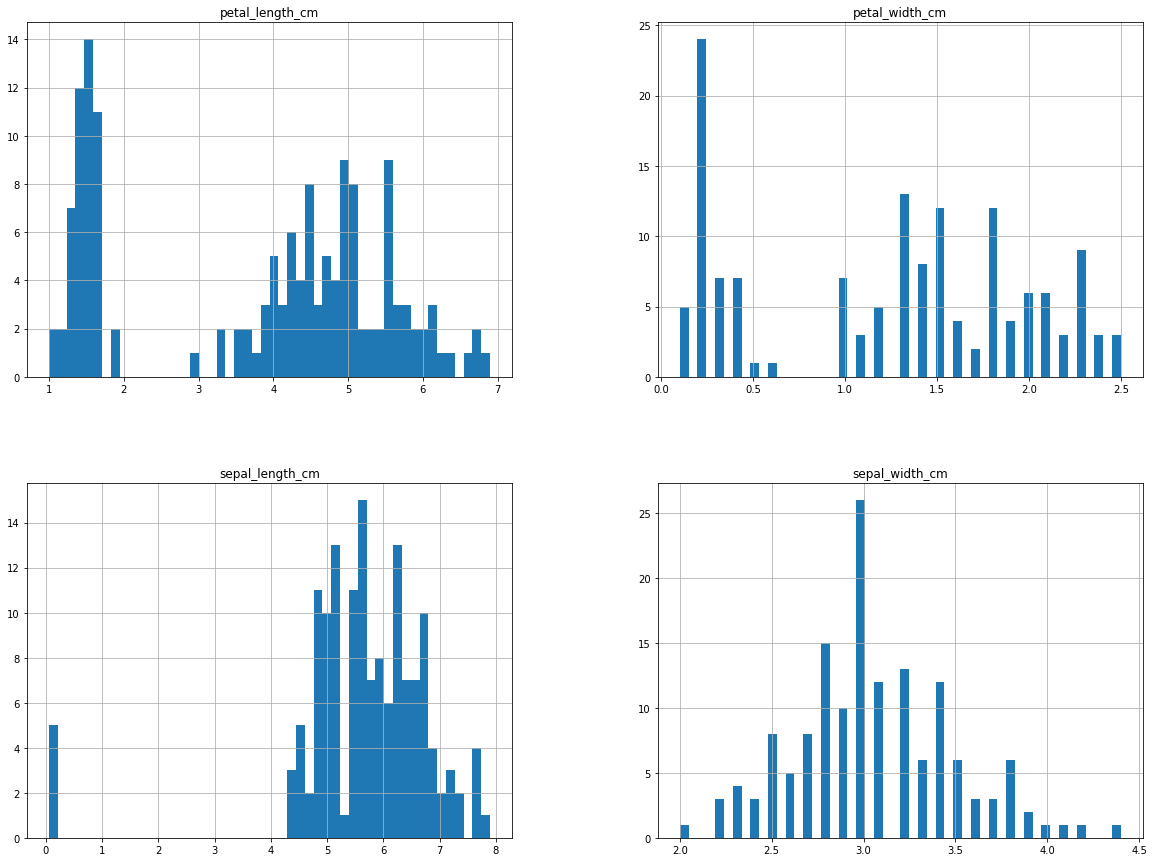

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

iris_data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [8]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

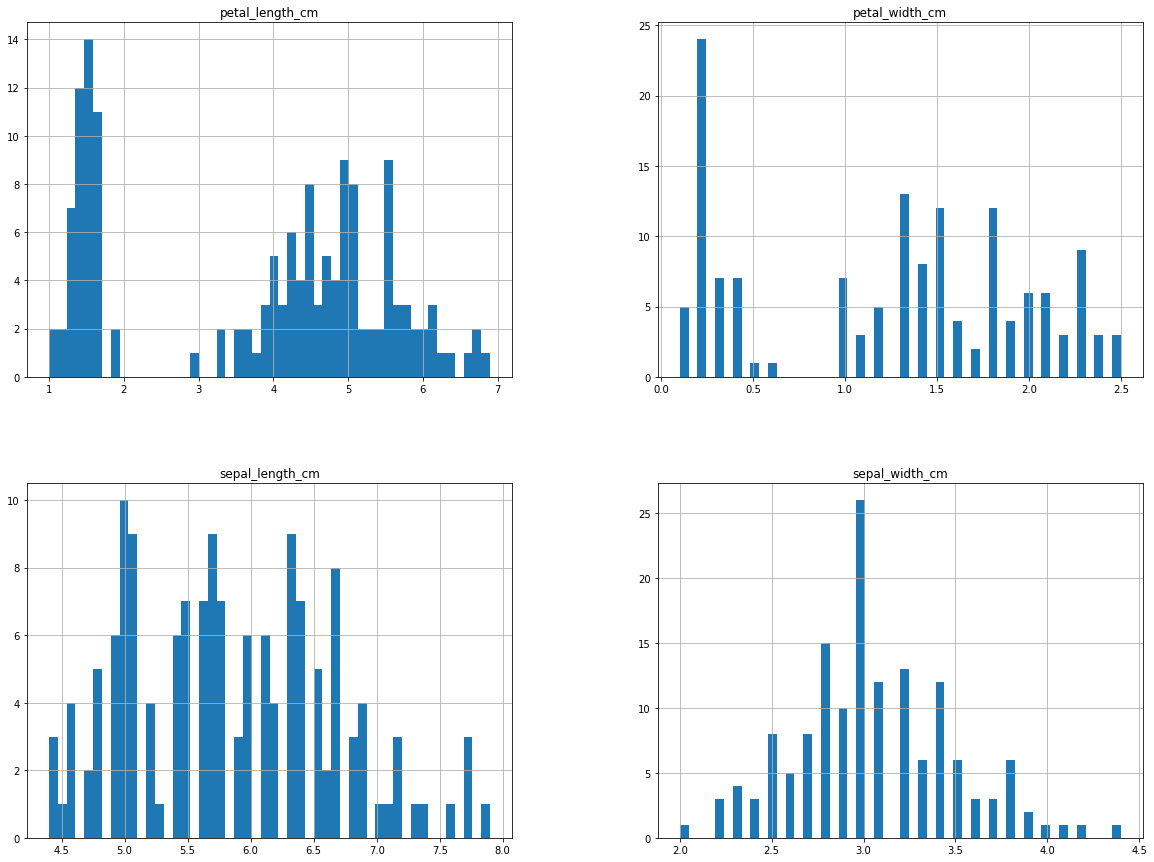

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

iris_data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1179af390>,
      dtype=object)

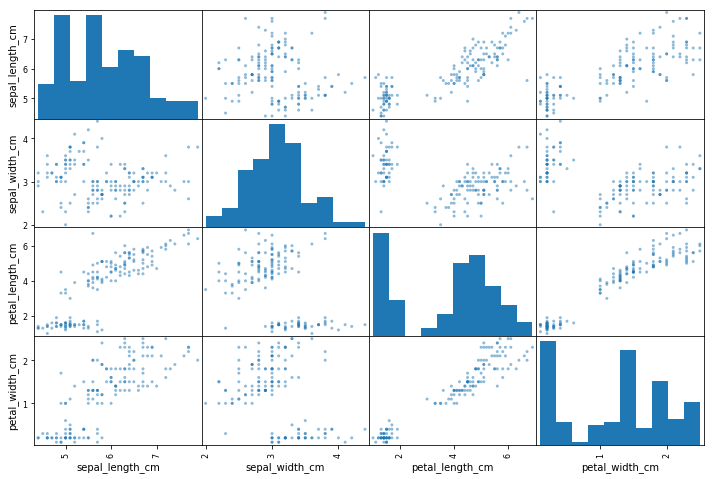

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                  "petal_width_cm"]
scatter_matrix(iris_data[attributes], figsize=(12, 8))

In [11]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [12]:
iris_data_features = iris_data.columns.values
iris_data_features

array(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'], dtype=object)

In [13]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values ="NaN", strategy="median")
iris_data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm']] = imputer.fit_transform(iris_data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm']])
imputer.statistics_

array([5.8 , 3.  , 4.35, 1.3 ])

In [14]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [15]:
iris_data[7:12]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,1.3,Iris-setosa
8,4.4,2.9,1.4,1.3,Iris-setosa
9,4.9,3.1,1.5,1.3,Iris-setosa
10,5.4,3.7,1.5,1.3,Iris-setosa
11,4.8,3.4,1.6,1.3,Iris-setosa


In [16]:
from sklearn.model_selection import train_test_split

all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
all_labels = iris_data['class'].values

X_train, X_test, y_train, y_test = train_test_split(all_inputs,
                                                    all_labels, stratify=all_labels, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_classifer = RandomForestClassifier()
forest_classifer.fit(X_train, y_train)

forest_classifer.score(X_train, y_train)

1.0

In [18]:
forest_classifer.score(X_test, y_test)

0.9210526315789473

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30, 100], 'max_features': [1, 2, 4]}
]

grid_search = GridSearchCV(forest_classifer, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
forest_classifier = grid_search.best_estimator_
forest_classifier.score(X_test, y_test)

0.9473684210526315

In [21]:
from sklearn.externals import joblib 

joblib.dump(forest_classifier, 'classifier.pkl') 

print("Done!")

Done!
